In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [3]:
from scipy.io import loadmat
data_train = loadmat('data/sarcos_inv.mat')
data_test = loadmat('data/sarcos_inv_test.mat')

x_train = data_train['sarcos_inv'][:,:21]
y_train = data_train['sarcos_inv'][:,21:22]
y_var = np.var(y_train)

x_test = data_test['sarcos_inv_test'][:,:21]
y_test = data_test['sarcos_inv_test'][:,21:22]

### Exploring the Data

In [23]:
import time
for i in range(x_train.shape[1]):
    plt.plot(x_train[:100,i])
    plt.show()
    time.sleep(0.5)
    clear_output()

KeyboardInterrupt: 

In [17]:
column_names = ['j1', 'j2', 'j3', 'j4', 'j5', 'j6', 'j7', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7','a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 't1']

data = pd.DataFrame(np.concatenate([x_train,y_train],axis=1), columns = column_names)

data.head()

,j1,j2,j3,j4,j5,j6,j7,v1,v2,v3,...,v6,v7,a1,a2,a3,a4,a5,a6,a7,t1
0,0.019478,-0.134218,0.027439,1.516401,0.300936,0.058259,0.150134,-0.266791,-0.237134,-0.091272,...,0.012774,-1.930253,13.439378,-8.935911,14.242047,13.520240,11.695956,1.210212,-22.119289,50.292652
1,0.017279,-0.137077,0.026999,1.532517,0.301344,0.058259,0.128653,-0.153640,-0.335279,0.006449,...,0.017012,-2.211089,11.989628,-7.781117,11.613101,9.550076,14.643369,1.015070,-17.048688,44.104164
2,0.016336,-0.140878,0.027250,1.549670,0.302318,0.059027,0.104104,-0.047313,-0.418732,0.106274,...,0.015857,-2.337160,9.961797,-5.468357,9.550884,5.933340,15.467628,0.910548,-11.415526,37.354858
3,0.016273,-0.145307,0.029072,1.566855,0.307628,0.059027,0.080321,0.053238,-0.460963,0.188013,...,0.007958,-2.331961,7.332938,-2.434889,7.664916,3.964112,10.309203,0.921360,-5.772058,30.676065
4,0.017279,-0.150051,0.031083,1.584416,0.314162,0.059027,0.058840,0.133810,-0.462264,0.263975,...,-0.001271,-2.249311,3.797804,0.467865,6.160604,3.175643,2.868096,1.059957,-0.491542,25.920128


In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

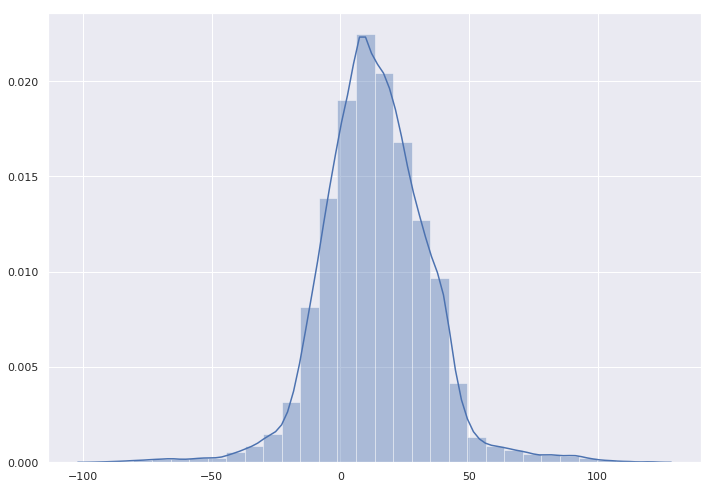

In [19]:
sns.distplot(y_train, bins=30)

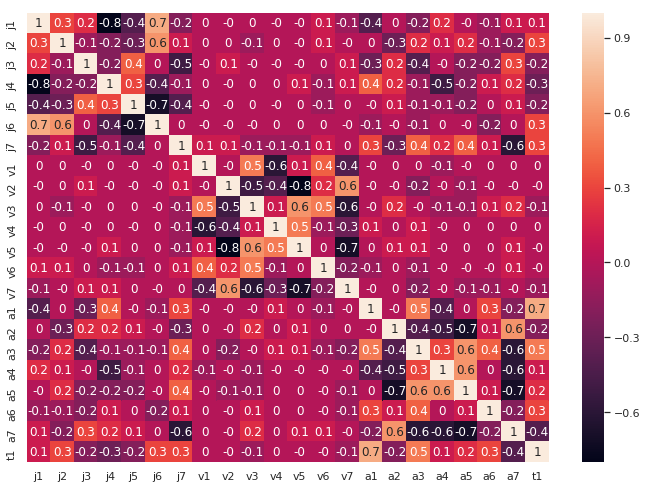

In [62]:
corr_matrix = data.corr().round(1)
sns.heatmap(data=corr_matrix, annot=True)

### Using Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

y_train_predict = lin_model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predict))

y_test_predict = lin_model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))

print rmse_train**2/y_var, rmse_test**2/y_var

0.07358881422797746 0.0742260930330343


### Sparse GPR

### Polynomial Linear Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
print x_train.shape, x_train_poly.shape

In [9]:
lin_model.fit(x_train_poly, y_train)

y_train_predicted_poly = lin_model.predict(x_train_poly)
y_test_predicted_poly = lin_model.predict(x_test_poly)

rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_predicted_poly))
rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_predicted_poly))

print rmse_train_poly**2/y_var, rmse_test_poly**2/y_var

0.014169471380326136 0.01353103981524647


In [ ]:
degree 2: 0.033476296506084254 0.032307343370017914
degree 3: 0.014169471380326136 0.01353103981524647

### SVR

In [43]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [ ]:
svr_rbf.fit(x_train,y_train)

In [ ]:
svr_lin.fit(x_train,y_train)
svr_poly.fit(x_train,y_train)

In [ ]:
y_train_predicted_svr = svr_rbf.predict(x_train_svr)
y_test_predicted_svr = svr_rbf.predict(x_test_svr)

rmse_train_svr = np.sqrt(mean_squared_error(y_train, y_train_predicted_svr))
rmse_test_svr = np.sqrt(mean_squared_error(y_test, y_test_predicted_svr))

print rmse_train_svr**2/y_var, rmse_test_svr**2/y_var